Please **submit this Jupyter notebook through Canvas** no later than **Monday November 5 12:59**, before the start of the lecture.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

**Jordan Earle** (12297127)

**Natasja Wezel** (11027649)

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

# since Jordan is using Python 2.something
from __future__ import division

-----
# Exercise 1
Consider the function $f(x) = \tan(x)$. Because $\tan(x) = \sin(x) / \cos(x)$, we can approximate $f(x)$ using Taylor approximations for $\sin(x)$ and $\cos(x)$:
$$
  \sin(x) \approx x - \frac{1}{6} x^3, \quad \text{and} \quad \cos(x) \approx 1 - \frac{1}{2} x^2.
$$
This gives the approximation
$$
\hat f(x) = \frac{x - \frac{1}{6} x^3}{1 - \frac{1}{2} x^2}.
$$

## (a)
Evaluate $f(x)$ and $\hat f(x)$ at $x = 1$ and $x = 1.4$. Compute the absolute forward error and absolute backward error.

In [2]:
import math
import numpy as np


def actualfunc(x):
    #print(x)
    return np.tan(x)

def deractfunc(x):
    tmp  = np.cos(x)**-2
    return tmp

def approxfunc(x):
    # tan = sin/cos
    approximate_sin = x - ((1 / 6) * x**3)
    approximate_cos = 1 - ((1 / 2) * x**2)
    
    return approximate_sin/approximate_cos

def derapproxfunc(x):
    return (x**4 + 12)/(3*(2-x**2)**2)

x0 = 1
x1 = 1.4

exact_fx0 = actualfunc(x0)
exact_fx1 = actualfunc(x1)

approximate_fx0 = approxfunc(x0)
approximate_fx1 = approxfunc(x1)

# exact - approximate for the forward error
fe_x0 = np.abs(exact_fx0 - approximate_fx0)
fe_x1 = np.abs(exact_fx1 - approximate_fx1)

# exact - approximate for the backward error
xhead_0 = np.arctan(approximate_fx0)
xhead_1 = np.arctan(approximate_fx1)

be_x0 = np.abs(x0 - xhead_0)
be_x1 = np.abs(x1 - xhead_1)

print("Forward and backward error for x:", x0)
print("f:", fe_x0)
print("b:", be_x0, "\n")

print("Forward and backward error for x:", x1)
print("f:", fe_x1)
print("b:", be_x1)

Forward and backward error for x: 1
f: 0.10925894201176445
b: 0.030376826524312506 

Forward and backward error for x: 1.4
f: 41.335449617850145
b: 0.14958310200286484


## (b)
Ignore $\hat f(x)$ for now. Compute the relative condition number of $f(x)$ near $x=1$ and near $x=1.4$.

Condition number = $\frac{|(f(\hat x) - f(x))/f(x)|}{|(\hat x - x)/x|} = \frac{|(\hat y - y / y)|}{|(\hat x - x)/x|}$

or as an approximation without using $\hat f$

Condition number = $\frac{|(f'(x)x|}{|(f(x)|}$ where $f'(x) = sec^2(x)$

In [3]:
# compute relative condition numbers
#cn0 =  np.abs(((actualfunc(xhead_0) - actualfunc(x0))/actualfunc(x0))/(be_x0/x0))
#cn1 =  np.abs(((actualfunc(xhead_1) - actualfunc(x1))/actualfunc(x1))/(be_x1/x1))

#print("Condition number near x = 1: ", cn0)
#print("Condition number near x = 1.4: ", cn1)

cn0 = np.abs(deractfunc(x0)*x0)/actualfunc(x0)

cn1 = np.abs(deractfunc(x1)*x1)/abs(actualfunc(x1))
#
#print(derfunc(x1))
#print(np.cos(1.4)**-2)
#print(np.tan(1.4))
#print(actualfunc(x1))

print("Condition number near x = 1: ", cn0)
print("Condition number near x = 1.4: ", cn1)

Condition number near x = 1:  2.1995003405892324
Condition number near x = 1.4:  8.358504617840559


## (c)
Compute the relative condition number of $\hat f(x)$ near $x=1$ and near $x=1.4$.

In [4]:
# compute relative condition numbers
# This is using the actual definition
#ch0 = np.abs(((approxfunc(xhead_0) - approxfunc(x0))/approxfunc(x0))/(be_x0/x0))
#ch1 = np.abs(((approxfunc(xhead_1) - approxfunc(x1))/approxfunc(x1))/(be_x1/x1))

#This is using the approximation

ch0 = np.abs(derapproxfunc(x0)*x0)/abs(approxfunc(x0))
ch1 = np.abs(derapproxfunc(x1)*x1)/abs(approxfunc(x1))

print("Condition number near x = 1: ", ch0)
print("Condition number near x = 1.4: ", ch1)

Condition number near x = 1:  2.5999999999999996
Condition number near x = 1.4:  98.02970297029638


--------
# Exercise 2
Consider the following finite difference approximations of the second derivative of a function $f(x)$:
$$
\text{Centered FD:} \quad f''(x) \approx \frac{f(x+h) - 2f(x) + f(x-h)}{h^2},
$$
$$
\text{Forward FD:} \quad f''(x) \approx \frac{f(x+2h) - 2f(x+h) + f(x)}{h^2}.
$$

## (a)
Consider the function $f(x) = \exp(-2x)$ evaluated at $x = 0.5$. Compute both finite difference approximations for the range $h \in \{1, 10^{-1}, \ldots, 10^{-16}\}$.

In [4]:
# define the function we're going to evaluate
def e_func(x):
    return np.exp(-2 * x)

# evaluate around x = 0.5
x = 0.5

# evaluate with different ranges for h
h_list = []
for i in range(17):
    h_list.append(10**-i)

# compute both finite different approximations for the different values of the range h
# TODO: is something going wrong since there are zero's in this list? Nope, it's computational error
for h in h_list:
    centered_fd = (e_func(x + h) - 2 * e_func(x) + e_func(x - h))/(h**2)
    forward_fd = (e_func(x + 2*h) - 2 * e_func(x + h) + e_func(x))/(h**2)

    print("centered fd, forward fd for h: ", h, centered_fd, forward_fd)

centered fd, forward fd for h:  1 2.0323100144840245 0.2750432514347999
centered fd, forward fd for h:  0.1 1.476429368653903 1.208798128864452
centered fd, forward fd for h:  0.01 1.4715668159320794 1.4424278406588442
centered fd, forward fd for h:  0.001 1.4715182551916506 1.4685781597467695
centered fd, forward fd for h:  0.0001 1.4715177687474323 1.4712234930325252
centered fd, forward fd for h:  1e-05 1.4715179075253102 1.471487376392133
centered fd, forward fd for h:  1e-06 1.4714340856869512 1.4716561302918763
centered fd, forward fd for h:  1e-07 1.4765966227514584 1.459943277382081
centered fd, forward fd for h:  1e-08 0.5551115123125782 2.775557561562891
centered fd, forward fd for h:  1e-09 0.0 0.0
centered fd, forward fd for h:  1e-10 -5551.115123125782 5551.115123125782
centered fd, forward fd for h:  1e-11 -555111.5123125783 555111.5123125783
centered fd, forward fd for h:  1e-12 0.0 0.0
centered fd, forward fd for h:  1e-13 -5551115123.125782 11102230246.251564
centered 

## (b)
Using the true second derivative $f''(x)$ at $x=0.5$, plot the total error of the two approximations as a function of $h$, like Figure 1.1 of the book by Heath.

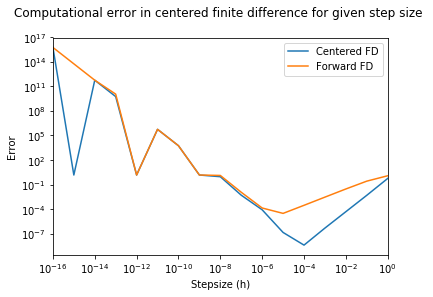

In [5]:
# define true second derivative of the function
def e_second_d(x):
    return 4 * np.exp(-2 * x)

# make a list with the total errors
cfdl = []
ffdl = []
for h in h_list:
    centered_fd = abs((e_func(x + h) - (2 * e_func(x)) + e_func(x - h))/(h**2) - e_second_d(.5))
    forward_fd = abs((e_func(x + 2*h) - (2 * e_func(x + h)) + e_func(x))/(h**2) - e_second_d(.5))
    cfdl.append(centered_fd)
    ffdl.append(forward_fd)
    

fig, ax = plt.subplots()
plt.plot(h_list, cfdl, label = 'Centered FD')
plt.plot(h_list, ffdl, label = 'Forward FD')
plt.title("Computational error in centered finite difference for given step size \n")
ax.set_xlabel("Stepsize (h)")
ax.set_ylabel("Error")
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(10**-16,1)
plt.legend()

## (c)
Explain, in words, what you see. How do these approximations compare?

The errors in the system appear stable for values of h$<10^{-4}$, but once that is reached, the error begins to grow rapidly.  For small values of h the Centered FD seems to be more acurate than the Forward FD as the error at $10^{-4}$ is less than $10^{-7}$ for Centered FD, and around $10^{-4}$ for forward FD.

----
# Exercise 3 (Computer exercise 1.13 from the book)
If an amount $a$ is invested at interest rate $r$ compounded $n$ times per year, then the final value $f$ at the end of one year is given by
$$
  f = a (1 + r/n)^n.
$$
This is the familiar formula for _compound interest_. When simple interest, $n=1$. Typically, compounding is done quarterly ($n=4$) or daily ($n=365$). Obviously, the more frequent the compounding, the greater the final amount. But how much difference does this frequency actually make?

## (a)
Write a program that implements the compound interest formula. Test your program using an initial investment of $a=100$, interest rate of 5 percent (so $r=0.05$), and the following values for $n$: $1, 4, 12, 365$.
Do not use Pythons `pow` function, but compute $f$ as $a (1 + r/n) \cdot (1+r/n) \cdot \ldots \cdot (1+r/n)$.

In [7]:
# define my own power function
def x_to_the_n(function, power):
    number = function
    
    for i in range(power - 1):
        number *= function

    return(number)

def interest(a, r, n):
    return a * (1 + (r / n))**n

# define interest function
def interest_a(a, r, n):
    function = 1 + (r / n)
    power = n
    number = x_to_the_n(function, power)
    
    return a * number

initial_investment = 100
interest_rate = 0.05
frequention = [1, 4, 12, 365, 1000]

for n in frequention:
    print("Interest frequention:", n)
    end_investment = interest(initial_investment, interest_rate, n)
    print(end_investment)
    end_invesment = interest_a(initial_investment, interest_rate, n)
    print(end_investment, "\n")

Interest frequention: 1
105.0
105.0 

Interest frequention: 4
105.09453369140623
105.09453369140623 

Interest frequention: 12
105.1161897881733
105.1161897881733 

Interest frequention: 365
105.12674964674473
105.12674964674473 

Interest frequention: 1000
105.12697823318871
105.12697823318871 



## (b)
We can rewrite $f$ as $f = a \exp(n \log(1 + r/n))$. Using this formula, do the same as in (a).

In [17]:
# define the new interest function
def interest_b(a, r, n):
    return a * np.exp(n * np.log(1 + (r / n)))
                    
# compute new values
for n in frequention:
    print("Interest frequention:", n)
    end_investment = interest_b(initial_investment, interest_rate, n)
    print(end_investment, "\n")

Interest frequention: 1
105.0 

Interest frequention: 4
105.09453369140623 

Interest frequention: 12
105.1161897881733 

Interest frequention: 365
105.12674964674473 

Interest frequention: 1000
105.12697823318871 



## (c)
Can you find a value of $n$ such that the formula of (a) becomes unstable? Explain this phenomenon in words. 

When n approaches $10^{3}$ the error starts to climb rapidly. This can be seen when the endinvestment is plotted against the frequency of the interest, with a logarithmic axis. The first figure is without logarithmic axis, and in the second figure we can clearly see the unstability when n approaches $10^{3}$.


<Figure size 432x288 with 0 Axes>

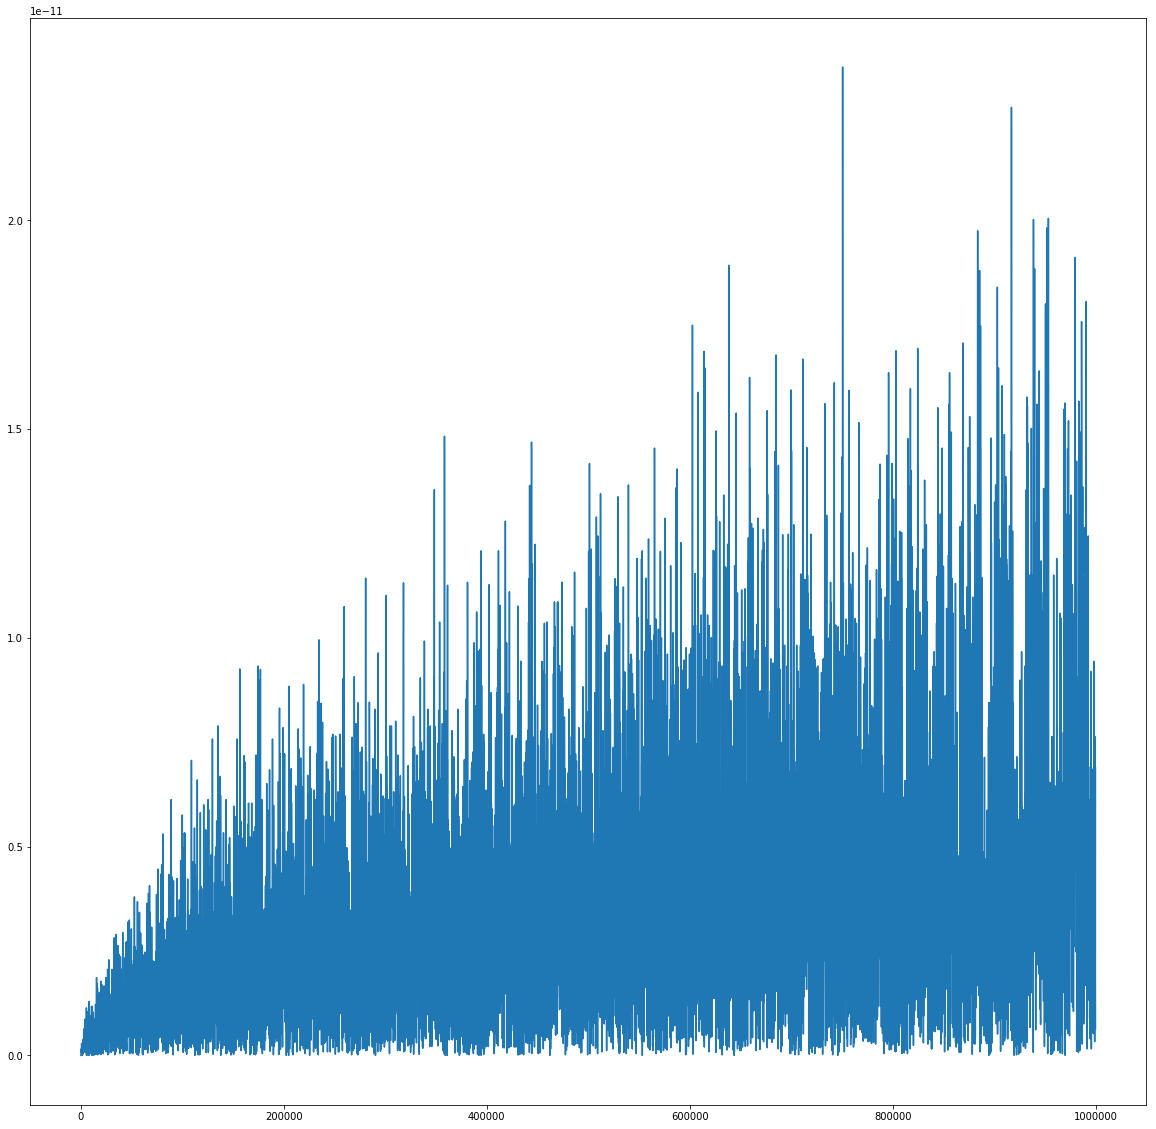

In [12]:
rangen = []
endinvest = []
for n in np.arange(1, 1000000, 100):
    #comprate = 10**n
    rangen.append(n)
    #print("Interest frequention:", n)
    #end_investment = interest(initial_investment, interest_rate, n)
    #print(end_investment)
    end_investment = abs(interest_a(initial_investment, interest_rate, n)-interest_b(initial_investment, interest_rate, n))
    endinvest.append(end_investment)
    #print(end_investment, "\n")

plt.figure(0)
plt.figure(figsize=(20,20))
plt.plot(rangen, endinvest)

<Figure size 432x288 with 0 Axes>

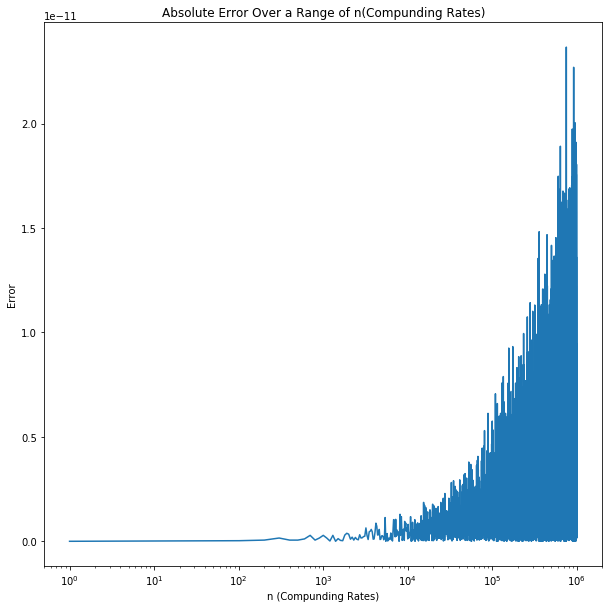

In [15]:
plt.figure(0)
plt.figure(figsize=(10,10))
plt.title("Absolute Error Over a Range of n(Compunding Rates)")
plt.xlabel("n (Compunding Rates)")
plt.ylabel("Error")
plt.plot(rangen, endinvest)
plt.xscale('log')